In [2]:
import pandas as pd
import duckdb

In [8]:
with duckdb.connect('../data/avito_db.duckdb') as w:
    zz = w.execute('select * from RAW.avito_RE').df()

In [13]:
zz.drop('datetime',axis=1).drop_duplicates().shape

(203, 11)

In [20]:
color_dict = dict(zip(zz['metro_branch'].unique(),[None, 'Голубая','Салатовая','Синяя','Зеленая','Фиолетовая','Красная','Оранжевая','Серая','Желтая','Розовая','Коричневая','Светлосерая']))

In [18]:
[None, 'Голубая','Салатовая','Синяя','Зеленая','Фиолетовая','Красная','Оранжевая','Серая','Желтая','Розовая','Коричневая','Светлосерая']

[None,
 'Голубая',
 'Салатовая',
 'Синяя',
 'Зеленая',
 'Фиолетовая',
 'Красная',
 'Оранжевая',
 'Серая',
 'Желтая',
 'Розовая',
 'Коричневая',
 'Светлосерая']

<AxesSubplot:ylabel='metro_branch'>

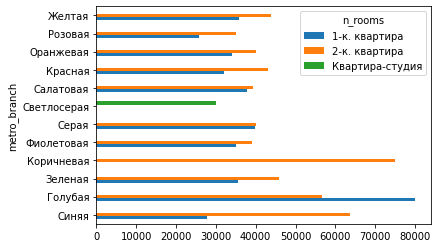

In [29]:
zz.groupby(['metro_branch','n_rooms'])['price'].mean().unstack().rename(index=color_dict).plot.barh()